<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Logistic%20Regression/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression from Scratch (No ML Libraries)

In this notebook, we will:

- Understand the theory behind logistic regression  
- Implement it from scratch using NumPy only  
- Train it on simple binary classification data  
- Visualize the decision boundary  
- Evaluate performance using accuracy


## What is Logistic Regression?

Logistic Regression is used for **binary classification** problems.

Instead of predicting a number (like in linear regression), we predict a **probability** that the sample belongs to **class 1**.

The model equation looks like:

$$
[
\hat{y} = \sigma(w \cdot x + b)
]
$$

Where $$( \sigma(z) )$$ is the **sigmoid function**:

$$
[
\sigma(z) = \frac{1}{1 + e^{-z}}
]
$$

The output is always between 0 and 1.


## Step 1: Imports & Data


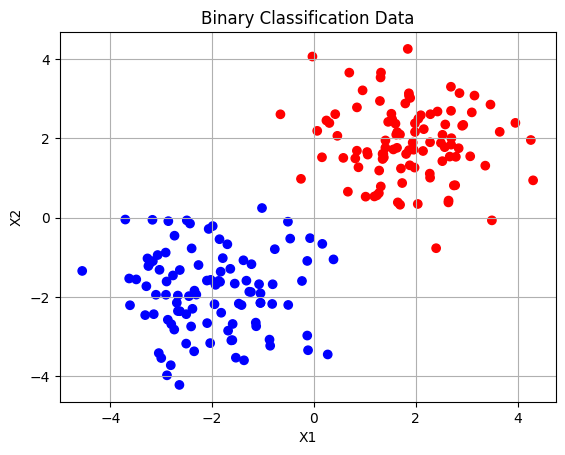

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate toy data (2D binary classification)
np.random.seed(0)
num_points = 100
X_class0 = np.random.randn(num_points, 2) + np.array([-2, -2])
X_class1 = np.random.randn(num_points, 2) + np.array([2, 2])

X = np.vstack((X_class0, X_class1))
y = np.array([0]*num_points + [1]*num_points).reshape(-1, 1)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr')
plt.title("Binary Classification Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

## Step 2: Initialize Parameters

In [2]:
n_samples, n_features = X.shape

# Parameters
w = np.zeros((n_features, 1))  # weights
b = 0                          # bias

# Hyperparameters
lr = 0.1
epochs = 1000

## Step 3: Define Sigmoid & Training Loop

### Sigmoid Function

Used to squash output between 0 and 1


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Training: Gradient Descent

Steps:
1. Compute linear model: $$( z = Xw + b )$$  
2. Apply sigmoid to get predicted probabilities  
3. Compute binary cross-entropy loss  
4. Compute gradients and update weights  


In [4]:
loss_history = []

for i in range(epochs):
    # Step 1: Linear model
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # Step 2: Loss (Binary Cross-Entropy)
    loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
    loss_history.append(loss)

    # Step 3: Gradients
    dz = y_pred - y
    dw = (1 / n_samples) * np.dot(X.T, dz)
    db = (1 / n_samples) * np.sum(dz)

    # Step 4: Update
    w -= lr * dw
    b -= lr * db

    if i % 200 == 0:
        print(f"Epoch {i} | Loss: {loss:.4f}")

Epoch 0 | Loss: 0.6931
Epoch 200 | Loss: 0.0246
Epoch 400 | Loss: 0.0165
Epoch 600 | Loss: 0.0130
Epoch 800 | Loss: 0.0110


## Step 4: Visualize Loss Curve

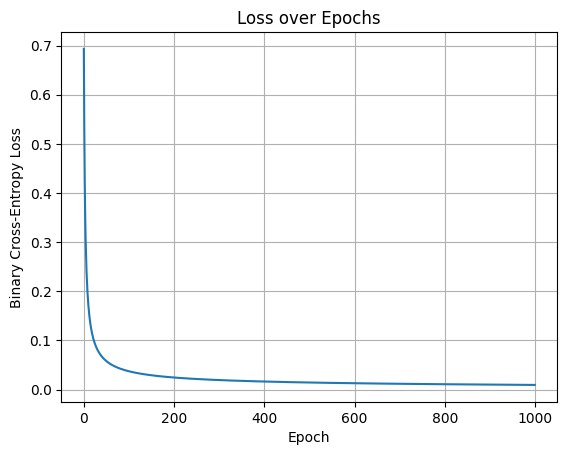

In [5]:
plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

## Step 5: Make Predictions

In [6]:
# Predict function
def predict(X, w, b):
    z = np.dot(X, w) + b
    probs = sigmoid(z)
    return (probs > 0.5).astype(int)

y_pred = predict(X, w, b)

## Step 6: Accuracy Evaluation

In [7]:
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## Step 7: Visualize Decision Boundary (Optional for 2D data)

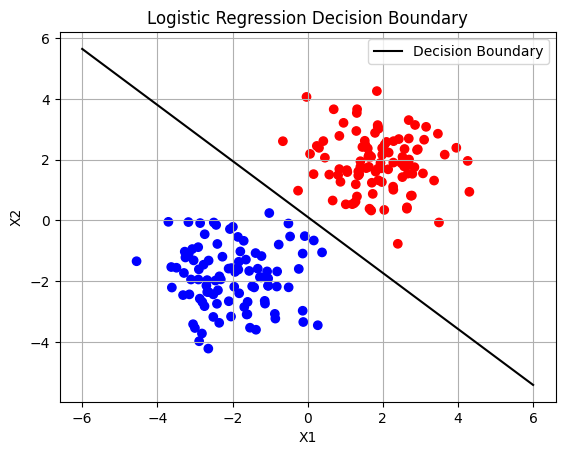

In [8]:
x1 = np.linspace(-6, 6, 100)
x2 = -(w[0]*x1 + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr')
plt.plot(x1, x2, color='black', label='Decision Boundary')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

## Summary

- We implemented logistic regression using only NumPy  
- Trained using binary cross-entropy loss and gradient descent  
- Predicted class labels and evaluated accuracy  
- Visualized the decision boundary for 2D data

Logistic regression is a powerful, interpretable model for binary classification problems.
